In [1]:
import json
import matplotlib.pyplot as plt
import os

In [2]:
with open(os.path.abspath(r'../../resources/all_grid_run__20250221T114712.json')) as file:
    sensor_data = json.load(file)

sensor_data[0]

{'message': 30276,
 'time': 1740138412.5136962,
 'sensors': 1,
 'type': 'welcome',
 'version': '1.7.7_161703',
 '1': {'time': 1740138412.511073,
  'sensor': '1',
  'data': '76C8,7C87,AE73,7A47,7D28,AAAA,7E59,7C4D,A74E,7D61,8080,B0F5,7DA9,8060,ABA3,79AE,8472,AB4E,7A49,837E,AD87,7F0A,8482,AA7F,82B6,7D00,B4C1,819E,7F0D,AFA9,8260,82B9,ACA4,830A,80EA,A086,7BA0,7CC4,B23B,7F57,80FB,AE51,7C66,80F5,A929,7DF2,8139,AC4F',
  'model': 'uSPa44',
  'taxels': 16,
  'special': [[30408, 31879, 44659, 0.0, 0, 0, 0, 0.0, 0, 0, 0, 0.0],
   [31303, 32040, 43690, 0.0, 0, 0, 0, 0.0, 0, 0, 0, 0.0],
   [32345, 31821, 42830, 0.0, 0, 0, 0, 0.0, 0, 0, 0, 0.0],
   [32097, 32896, 45301, 0.0, 0, 0, 0, 0.0, 0, 0, 0, 0.0],
   [32169, 32864, 43939, 0.0, 0, 0, 0, 0.0, 0, 0, 0, 0.0],
   [31150, 33906, 43854, 0.0, 0, 0, 0, 0.0, 0, 0, 0, 0.0],
   [31305, 33662, 44423, 0.0, 0, 0, 0, 0.0, 0, 0, 0, 0.0],
   [32522, 33922, 43647, 0.0, 0, 0, 0, 0.0, 0, 0, 0, 0.0],
   [33462, 32000, 46273, 0.0, 0, 0, 0, 0.0, 0, 0, 0, 0.0],
   [33

In [3]:
def convert_raw_sensor_data(data: list):
    out = []
    for reading in data:
        msg = reading['1']['data']
        msg = msg.split(',')
        msg = zip(msg[0::3], msg[1::3], msg[2::3])

        temp = {}
        for i, (x, y, z) in enumerate(msg):
            temp[str(i)] = {
                'time': reading['time'],  # keep it here for an easier plotting, 'has a UNIX timestamp of data creation', there is also a time for sensor reading
                'x': int(x, 16),
                'y': int(y, 16),
                'z': int(z, 16)
            }
        out.append(temp)
    return out


proc_sensor_data = convert_raw_sensor_data(sensor_data)
proc_sensor_data[0]

{'0': {'time': 1740138412.5136962, 'x': 30408, 'y': 31879, 'z': 44659},
 '1': {'time': 1740138412.5136962, 'x': 31303, 'y': 32040, 'z': 43690},
 '2': {'time': 1740138412.5136962, 'x': 32345, 'y': 31821, 'z': 42830},
 '3': {'time': 1740138412.5136962, 'x': 32097, 'y': 32896, 'z': 45301},
 '4': {'time': 1740138412.5136962, 'x': 32169, 'y': 32864, 'z': 43939},
 '5': {'time': 1740138412.5136962, 'x': 31150, 'y': 33906, 'z': 43854},
 '6': {'time': 1740138412.5136962, 'x': 31305, 'y': 33662, 'z': 44423},
 '7': {'time': 1740138412.5136962, 'x': 32522, 'y': 33922, 'z': 43647},
 '8': {'time': 1740138412.5136962, 'x': 33462, 'y': 32000, 'z': 46273},
 '9': {'time': 1740138412.5136962, 'x': 33182, 'y': 32525, 'z': 44969},
 '10': {'time': 1740138412.5136962, 'x': 33376, 'y': 33465, 'z': 44196},
 '11': {'time': 1740138412.5136962, 'x': 33546, 'y': 33002, 'z': 41094},
 '12': {'time': 1740138412.5136962, 'x': 31648, 'y': 31940, 'z': 45627},
 '13': {'time': 1740138412.5136962, 'x': 32599, 'y': 33019, '

In [9]:
def prep_for_plotting(data: list):
    plot_data_t = [[] for _ in range(16)]  # 16 sensors
    plot_data_x = [[] for _ in range(16)]  # 16 sensors
    plot_data_y = [[] for _ in range(16)]  # 16 sensors
    plot_data_z = [[] for _ in range(16)]  # 16 sensors

    for e in data:
        for k, v in e.items():
            plot_data_t[int(k)].append(v['time'])
            plot_data_x[int(k)].append(v['x'])
            plot_data_y[int(k)].append(v['y'])
            plot_data_z[int(k)].append(v['z'])

    assert len(plot_data_t) == len(plot_data_x) == len(plot_data_y) == len(plot_data_z)

    return plot_data_t, plot_data_x, plot_data_y, plot_data_y


ts, xs, ys, zs = prep_for_plotting(proc_sensor_data)
print('{}\n{}\n{}\n{}\n'.format(ts[0][:5], xs[0][:5], ys[0][:5], zs[0][:5]))

[1740138412.5136962, 1740138412.5136962, 1740138412.5136962, 1740138412.5136962, 1740138412.5136962]
[30408, 30408, 30408, 30408, 30408]
[31879, 31879, 31879, 31879, 31879]
[31879, 31879, 31879, 31879, 31879]



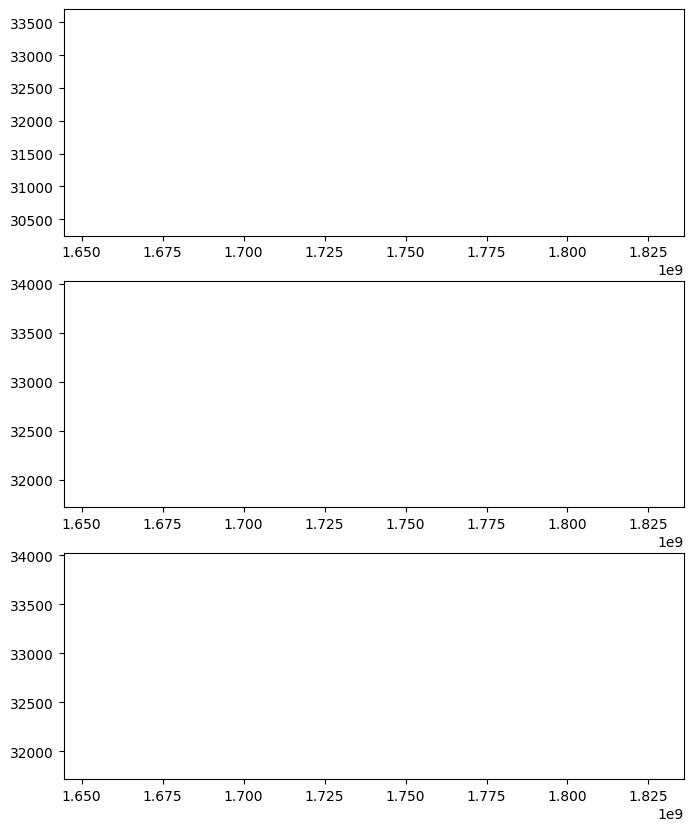

In [10]:
fig, axes = plt.subplots(3, 1, figsize=(8, 10))

x_ax, y_ax, z_ax = axes[0], axes[1], axes[2]

ts, xs, ys, zs = prep_for_plotting(proc_sensor_data)

for i in range(len(ts)):
    x_ax.plot(ts[i], xs[i], label=f'Sensor #{i}')
    y_ax.plot(ts[i], ys[i], label=f'Sensor #{i}')
    z_ax.plot(ts[i], zs[i], label=f'Sensor #{i}')

plt.show()